In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train1 = x_train.astype('float32') / 255.0
x_test1 = x_test.astype('float32') / 255.0
x_train = x_train1.reshape((60000, 28*28))
x_test = x_test1.reshape((10000, 28*28))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Autoencoder 구축

In [31]:
input_size = 784
hidden_size = 128
code_size = 32 # latent vector의 차원

# Encoder 부분 생성
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)

# Decoder 부분 생성
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)


In [32]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=3) # 정답 = 입력값

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0246
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0124A: 0s - lo
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0111


In [33]:
decoded_imgs = autoencoder.predict(x_test)

In [34]:
decoded_imgs = decoded_imgs.reshape((10000,28,28))

In [35]:
decoded_imgs.shape

(10000, 28, 28)

## 원래 이미지와 복원된 이미지 비교

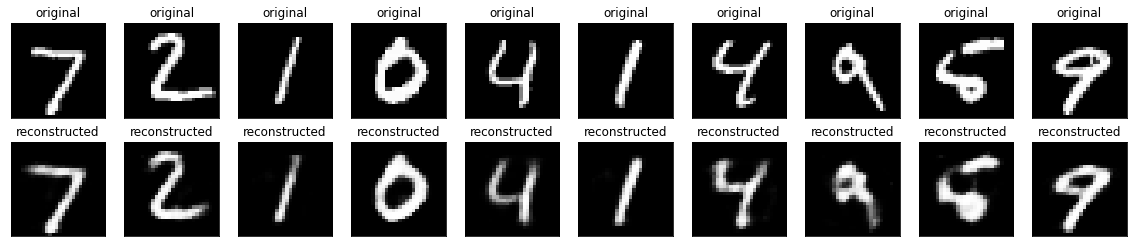

In [36]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test1[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 저차원 벡터 (representation vector)를 이용한 분류

In [37]:
encoder = Model(inputs=input_img, outputs=code) # encoder 부분만 추출

In [38]:
# encode the train data
X_train_encode = encoder.predict(x_train)
# encode the test data
X_test_encode = encoder.predict(x_test)

In [39]:
X_train_encode.shape

(60000, 32)

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [41]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape=(X_train_encode.shape[1],)))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 5,514
Trainable params: 5,514
Non-trainable params: 0
_________________________________________________________________


In [42]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [43]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001)

In [44]:
model.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [45]:
history = model.fit(X_train_encode, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.7259 - accuracy: 0.7809 - val_loss: 0.3262 - val_accuracy: 0.9029
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8947 - val_loss: 0.2747 - val_accuracy: 0.9176
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2753 - accuracy: 0.9167 - val_loss: 0.2206 - val_accuracy: 0.9348
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2316 - accuracy: 0.9305 - val_loss: 0.2344 - val_accuracy: 0.9283
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2029 - accuracy: 0.9385 - val_loss: 0.2044 - val_accuracy: 0.9392
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1809 - accuracy: 0.9455 - val_loss: 0.1652 - val_accuracy: 0.9520
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1654 - accuracy: 0.9494 - val_loss: 0.1716 - val_accuracy: 0.9467
Epoch 

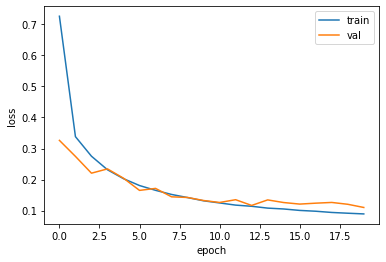

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()